In [1]:
# 数値処理
import pandas as pd 

# MIC相関
from minepy import MINE

# グラフ描画
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams["font.family"] = "Meiryo"
import seaborn as sns

# サンプルデータ
from sklearn.datasets import load_boston

# 警告非表示化
import warnings
warnings.filterwarnings('ignore')

# サンプルデータの読み込み

In [2]:
# サンプルデータのインスタンスを生成
boston = load_boston()

# 特徴量をデータフレームに格納
df = pd.DataFrame(boston.data, columns=boston.feature_names) 
display(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


# ピアソンの積率相関係数のヒートマップの描画

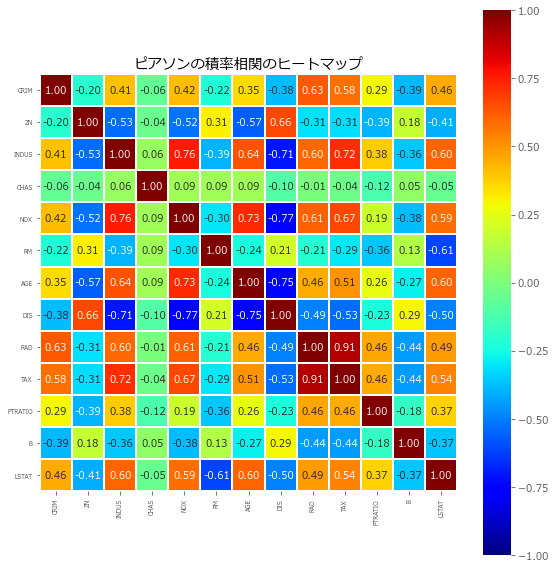

In [3]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), 
            linewidths=1,
            cmap='jet',
            square=True,
            annot=True,
            vmax=1,
            vmin=-1,
            center=0, 
            fmt="1.2f")
plt.axes().set_ylim(df.shape[1], 0)
plt.tick_params(axis='y', which='major', labelsize=6)
plt.tick_params(axis='x', which='major', labelsize=6)
plt.title("ピアソンの積率相関のヒートマップ")
plt.tight_layout()
plt.show()

# MIC相関係数行列の計算

In [4]:
#インスタンスの生成
mine = MINE(alpha=1, c=0.1, est="mic_e") 

# MIC相関行列用に空のデータフレームを作成
df_mic = pd.DataFrame(columns=df.columns, index=df.columns)

# forループ内でMIC相関係数を求め，先ほどのデータフレームに格納
for column in df.columns:

    for index in df.columns:

        # MIC相関係数の計算
        mine.compute_score(df[column], df[index])
        # 計算結果をデータフレームに書き込み
        df_mic.loc[index, column] = mine.mic()

# MICの相関係数のヒートマップの描画

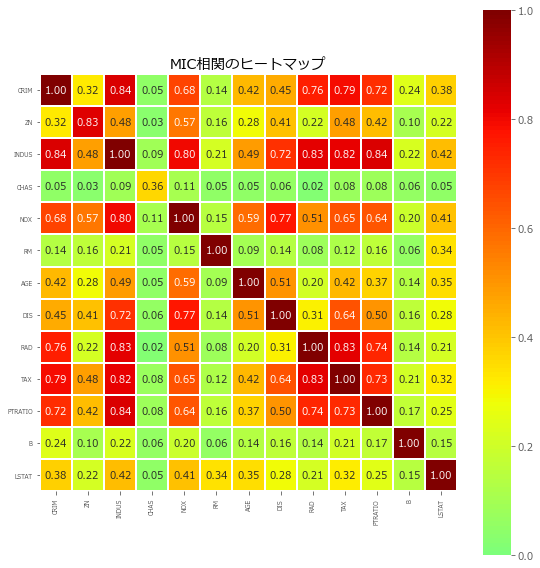

In [6]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_mic.astype(float),
            linewidths=1,
            cmap='jet',
            square=True,
            annot=True,
            vmax=1,
            vmin=0,
            center=0, 
            fmt="1.2f")
plt.axes().set_ylim(df_mic.shape[1], 0)
plt.tick_params(axis='y', which='major', labelsize=6)
plt.tick_params(axis='x', which='major', labelsize=6)
plt.grid(None)
plt.title("MIC相関のヒートマップ")
plt.tight_layout()
plt.show()